In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix

train_data = pd.read_csv('./mitbih_train.csv')
test_data = pd.read_csv('./mitbih_test.csv')

test_data.head(-1)
# 21889

X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values 

X_train.shape

# scaler = StandardScaler()
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

X_train.shape

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(y_train.argmax(axis=1)), y=y_train.argmax(axis=1)                   )
class_weights_dict = dict(enumerate(class_weights))

def model(input_shape, num_classes):
    model = models.Sequential()
    
    model.add(layers.Conv1D(128, 5, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2))

    model.add(layers.Conv1D(256, 3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))

    model.add(layers.Conv1D(512, 3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))

    model.add(layers.Conv1D(256, 3, activation='relu'))
    model.add(layers.MaxPooling1D(pool_size=2))

    model.add(layers.GlobalAveragePooling1D())
    
    model.add(layers.Dense(128, activation='relu'))
    
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model


# def model(input_shape, num_classes):
#     inputs = layers.Input(shape=input_shape)

#     x = layers.Conv1D(64, 3, padding='same')(inputs)
#     x = layers.BatchNormalization()(x)
#     x = layers.ReLU()(x)
    
#     def residual_block(x, filters):
#         shortcut = x
#         x = layers.Conv1D(filters, 3, padding='same')(x)
#         x = layers.BatchNormalization()(x)
#         x = layers.ReLU()(x)
#         x = layers.Conv1D(filters, 3, padding='same')(x)
#         x = layers.BatchNormalization()(x)
#         x = layers.add([x, shortcut])  # Add the shortcut
#         x = layers.ReLU()(x)
#         return x

#     for _ in range(3):
#         x = residual_block(x, 64)

#     x = layers.GlobalAveragePooling1D()(x)

#     outputs = layers.Dense(num_classes, activation='softmax')(x)

#     model = models.Model(inputs, outputs)
#     return model

X_train.shape[1]

model = model(input_shape=(X_train.shape[1], 1), num_classes=num_classes)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict)









C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 183, 128)            │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 91, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 89, 256)             │          98,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 44, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 42, 512)             │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 21, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 19, 256)             │         393,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 9, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ (None, 256)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 920,069 (3.51 MB)

 Trainable params: 920,069 (3.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 91s 32ms/step - accuracy: 0.4291 - loss: 1.1593 - val_accuracy: 0.6368 - val_loss: 0.8962
Epoch 2/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 92s 34ms/step - accuracy: 0.7782 - loss: 0.5137 - val_accuracy: 0.7107 - val_loss: 0.7957
Epoch 3/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 92s 34ms/step - accuracy: 0.8314 - loss: 0.4017 - val_accuracy: 0.8319 - val_loss: 0.5117
Epoch 4/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 95s 35ms/step - accuracy: 0.8488 - loss: 0.3352 - val_accuracy: 0.8233 - val_loss: 0.5187
Epoch 5/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 89s 32ms/step - accuracy: 0.8693 - loss: 0.3024 - val_accuracy: 0.8942 - val_loss: 0.3194
Epoch 6/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 90s 33ms/step - accuracy: 0.8826 - loss: 0.2439 - val_accuracy: 0.8908 - val_loss: 0.3273
Epoch 7/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 89s 32ms/step - accuracy: 0.8932 - loss: 0.2111 - val_accuracy: 0.9053 - val_loss: 0.2752
Epoch 8/50
2737/2737 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9044 -

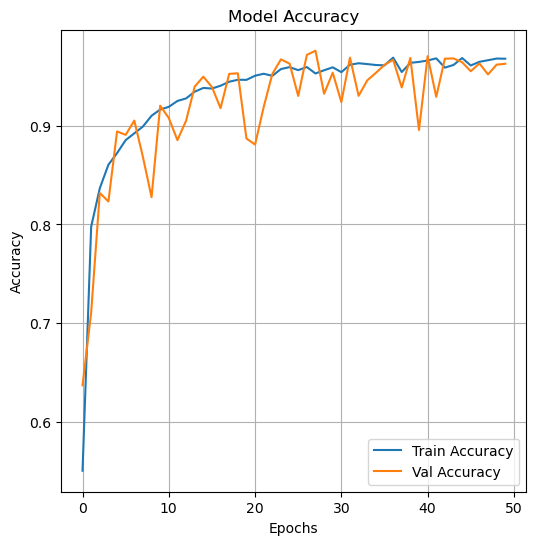

In [14]:
plt.figure(figsize=(6, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  
y_true = np.argmax(y_test, axis=1) 

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

685/685 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9628 - loss: 0.1189
Test Accuracy: 0.9629
685/685 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     18117
           1       0.50      0.88      0.64       556
           2       0.92      0.97      0.94      1448
           3       0.58      0.91      0.71       162
           4       0.99      0.99      0.99      1608

    accuracy                           0.96     21891
   macro avg       0.80      0.94      0.85     21891
weighted avg       0.97      0.96      0.97     21891



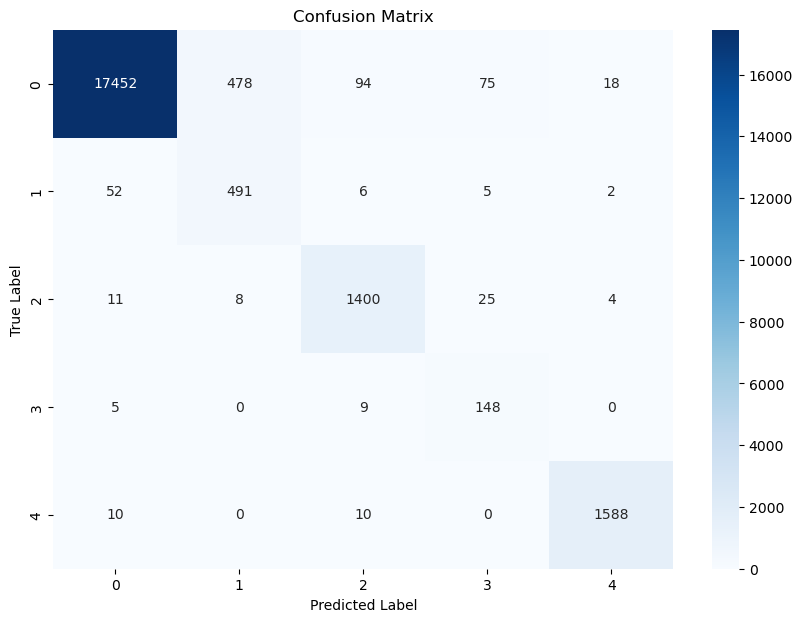

In [18]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [12]:
sample_index = 20289
sample_data = X_test[sample_index:sample_index + 1]  

predictions = model.predict(sample_data)
predicted_class = np.argmax(predictions, axis=1)  

original_labels = np.unique(y_test.argmax(axis=1)) 
predicted_label = original_labels[predicted_class[0]]
actual_label = np.argmax(y_test[sample_index])

print(f'Sample Index: {sample_index}')
print(f'Actual Label Index: {actual_label}')
print(f'Actual Label: {original_labels[actual_label]}')
print(f'Predicted Class Index: {predicted_class[0]}')
print(f'Predicted Label: {predicted_label}')
print(f'Prediction Probabilities: {predictions}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
Sample Index: 20289
Actual Label Index: 4
Actual Label: 4
Predicted Class Index: 4
Predicted Label: 4
Prediction Probabilities: [[5.6915697e-17 1.0928769e-23 6.0736247e-14 0.0000000e+00 1.0000000e+00]]
